# Python Workshop 5: Data Exploration and Visualization Workshop

This workshop is our last workshop in TB1.

This session serves as both a culmination of our foundational Python workshops—spanning data types, control structures, functions, data structures, object-oriented programming, NumPy, and Pandas—and an introduction to essential data exploration and visualization techniques.

We will begin with a focused introduction to Matplotlib, covering its core functionalities for creating visual representations of data. Participants will learn to use visualizations as a tool to identify key data characteristics and trends, laying the groundwork for deeper analysis. Following this, we will explore two real-world datasets: the Titanic dataset and the Starbucks worldwide locations dataset. Through these datasets, we will demonstrate practical approaches to data exploration, including examining data distributions, identifying patterns, and handling missing values.

By the end of this workshop, you will have developed a well-rounded understanding of data visualization and exploration, equipping you with practical skills to begin analyzing and interpreting data confidently and effectively.

## Quick tutorial for matplotlib.pyplot
`matplotlib.pyplot` is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### A simple showcase

Matplotlib graphs your data on `Figures` (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more `Axes`, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.). The simplest way of creating a `Figure` with an `Axes` is using `pyplot.subplots()`. We can then use `Axes.plot()` to draw some data on the `Axes`, and `show()` to display the figure:

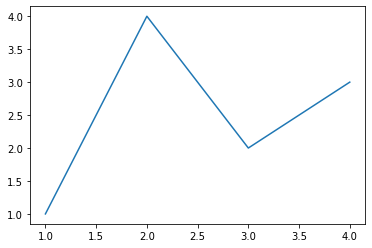

In [2]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.(not explicitly needed in Jupyter Notebooks, but useful in scripts)

### Parts of a Figure
Here are the components of a Matplotlib Figure.

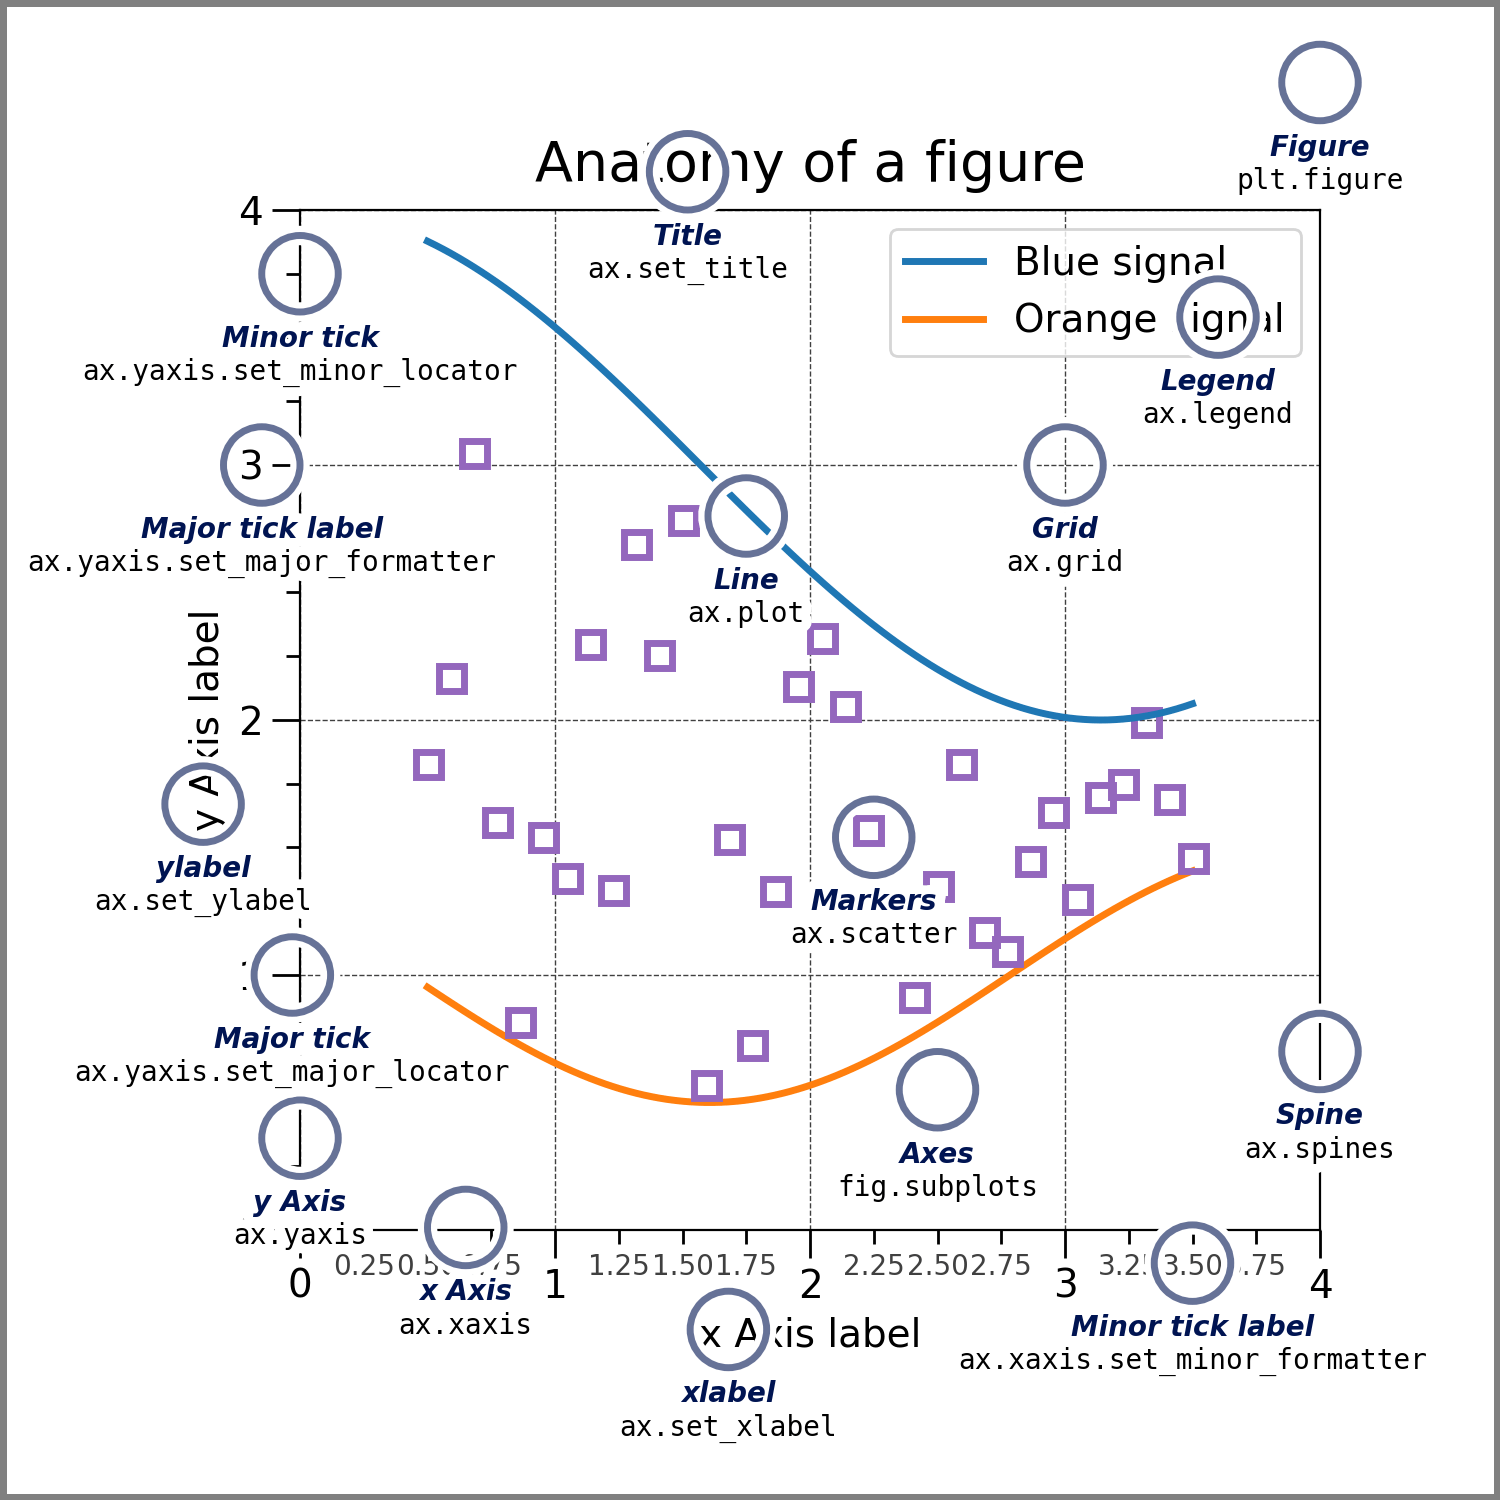

There are a lot of elements in the `Figure` (containing `Figure` itself). Here's a structured look at these core components and how they interact:

#### 1.[`Figure`](https://matplotlib.org/stable/users/explain/figure/index.html)
When looking at Matplotlib visualization, you are almost always looking at elements placed on a `Figure`. The whole figure and the top level container for all the plot elements. The `Figure` keeps track of all the child `Axes`, a group of 'special' `Artists` (titles, figure legends, colorbars, etc.), and even nested subfigures.

Typically, you'll create a new Figure through one of the following functions:

<Figure size 432x288 with 0 Axes>

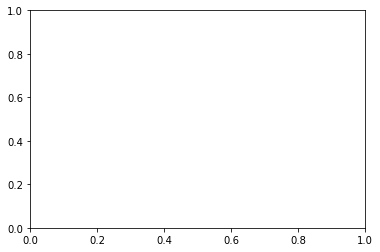

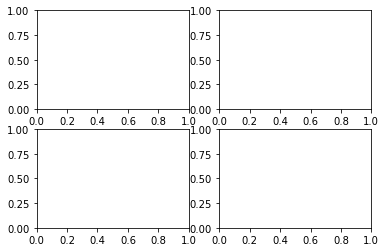

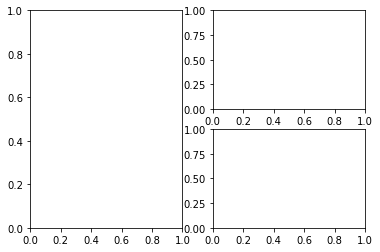

In [3]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

`subplots()` and `subplot_mosaic()` are convenience functions that additionally create `Axes` objects inside the `Figure`, but you can also manually add `Axes` later on.

#### 2.[`Axes`](https://matplotlib.org/stable/users/explain/axes/index.html)
An `Axes` object encapsulates all the elements of an individual (sub-)plot in a figure.

It could be created with `ax = fig.subplots()` or `fig, axs = plt.subplots()`. Everything else on the figure was created with methods on this `ax` object, or can be accessed from it. If we want to change the label on the x-axis, we call `ax.set_xlabel('New Label')`, if we want to plot some data we call `ax.plot(x, y)`. Indeed, in the figure above, the only Artist that is not part of the Axes is the Figure itself, so the `axes.Axes` class is really the gateway to much of Matplotlib's functionality.

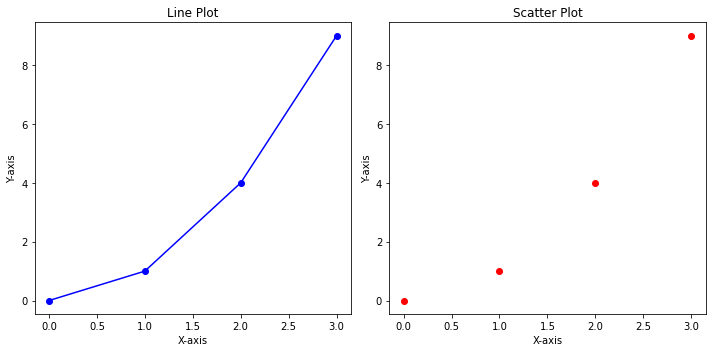

In [4]:
# Step 1: Create a Figure with a 1x2 grid of Axes
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Step 2: Plot data on the first Axes (ax1)
axs[0].plot([0, 1, 2, 3], [0, 1, 4, 9], marker='o', color='blue')  # Line plot
axs[0].set_title("Line Plot")  # Set the title for the first Axes
axs[0].set_xlabel("X-axis")    # Set the x-axis label for the first Axes
axs[0].set_ylabel("Y-axis")    # Set the y-axis label for the first Axes

# Step 3: Plot data on the second Axes (ax2)
axs[1].scatter([0, 1, 2, 3], [0, 1, 4, 9], color='red')  # Scatter plot
axs[1].set_title("Scatter Plot")  # Set the title for the second Axes
axs[1].set_xlabel("X-axis")       # Set the x-axis label for the second Axes
axs[1].set_ylabel("Y-axis")       # Set the y-axis label for the second Axes

# Step 4: Display the Figure with both Axes
plt.tight_layout()  # Adjust spacing to prevent overlap

#### 3.[`Artist`](https://matplotlib.org/stable/users/explain/artists/index.html)
Basically, everything visible on the `Figure` is an `Artist` (even `Figure`, `Axes`, and `Axis` objects). This includes `Text` objects, `Line2D` objects, `collections` objects, `Patch` objects, etc. When the Figure is rendered, all of the Artists are drawn to the **canvas**. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

Usually we do not instantiate Artists directly, but rather use a plotting method on Axes. The Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods ([`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot), [`text()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text), [`hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist), [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow)) to create the most common graphics primitives ([`Line2D`](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D), [`Text`](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text), [`Rectangle`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle), [`AxesImage`](https://matplotlib.org/stable/api/image_api.html#matplotlib.image.AxesImage), respectively). These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested.

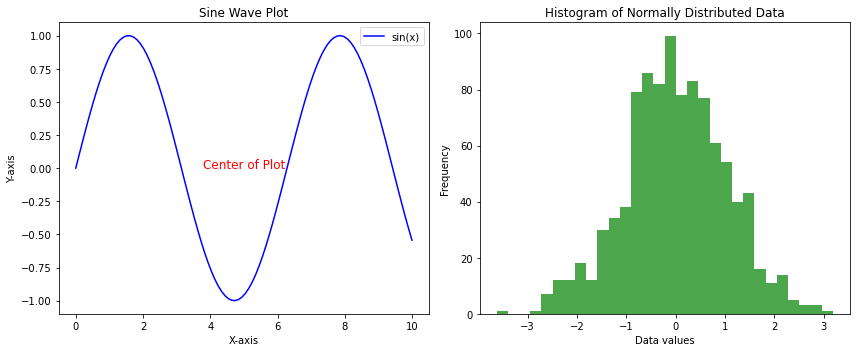

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data for the sine wave and histogram
x = np.linspace(0, 10, 100)  # x-values for the sine wave
y = np.sin(x)  # y-values for the sine wave
data = np.random.normal(0, 1, 1000)  # Data for the histogram

# Create a figure with two Axes objects (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First Axes: Plotting the sine wave
ax1.plot(x, y, label='sin(x)', color='blue')  
# ax1.plot(): Creates a Line2D artist to plot the sine wave.
# x: x-values, y: y-values, label: legend label, color: plot line color.

ax1.text(5, 0, 'Center of Plot', fontsize=12, color='red', ha='center')  
# ax1.text(): Adds a Text artist at coordinates (5, 0) with specified font size and color.

ax1.set_xlabel('X-axis')  # Sets the label for the x-axis.
ax1.set_ylabel('Y-axis')  # Sets the label for the y-axis.
ax1.set_title('Sine Wave Plot')  # Sets the title for the plot.
ax1.legend()  # Displays the legend for the plot.

# Second Axes: Creating a histogram
ax2.hist(data, bins=30, color='green', alpha=0.7)  
# ax2.hist(): Creates a histogram (Patch artist) with the specified data, bins, color, and transparency.

ax2.set_xlabel('Data values')  # ax2.set_xlabel(): Sets the x-axis label for the histogram.
ax2.set_ylabel('Frequency')  # ax2.set_ylabel(): Sets the y-axis label for the histogram.
ax2.set_title('Histogram of Normally Distributed Data')  # ax2.set_title(): Sets the title for the histogram.

# Adjust layout to ensure that subplots don't overlap
plt.tight_layout()  # plt.tight_layout(): Adjusts spacing between subplots.

# Show the plot
plt.show()  # plt.show(): Renders and displays the figure with all the artists.

### Coding styles: The explicit and the implicit interfaces
As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

So one can use the OO-style:

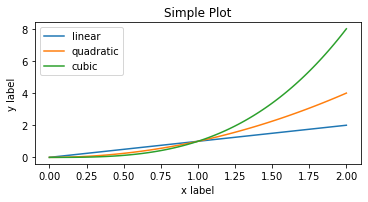

In [6]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the Axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the Axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the Axes.
ax.set_ylabel('y label')  # Add a y-label to the Axes.
ax.set_title("Simple Plot")  # Add a title to the Axes.
ax.legend()  # Add a legend.

or the pyplot-style:

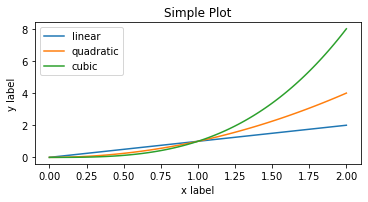

In [7]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) Axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

### Types of inputs to plotting functions
Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input, or objects that can be passed to `numpy.asarray`. Classes that are similar to arrays ('array-like') such as `pandas` data objects and `numpy.matrix` may not work as intended. Common convention is to convert these to `numpy.array` objects prior to plotting. For example, to convert a `numpy.matrix`:

In [8]:
# Create a numpy matrix
b = np.matrix([[1, 2], [3, 4]])
# Convert the numpy matrix to a numpy array
b_asarray = np.asarray(b)

Most methods will also parse a string-indexable object like a `dict`, a structured numpy array, or a `pandas.DataFrame`. Matplotlib allows you to provide the `data` keyword argument and generate plots passing the strings corresponding to the *x* and *y* variables.

Text(0, 0.5, 'entry b')

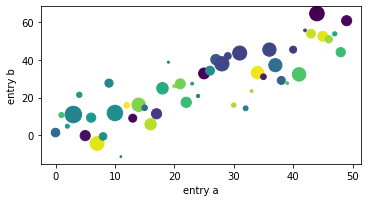

In [9]:
# Generate sample data
data = {
    'a': np.arange(50),                 # 'a' is a sequence from 0 to 49
    'c': np.random.randint(0, 50, 50),  # 'c' contains 50 random integers between 0 and 49
    'd': np.random.randn(50)            # 'd' contains 50 random numbers from a standard normal distribution
}

# Generate 'b' as 'a' plus a random variation, creating some relationship with 'a'
data['b'] = data['a'] + 10 * np.random.randn(50)  

# Modify 'd' to be positive values by taking the absolute value and scaling by 100
data['d'] = np.abs(data['d']) * 100

# Create a figure and a single Axes with constrained layout to optimize spacing
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

# Scatter plot using 'a' and 'b' as x and y values, with colors from 'c' and sizes from 'd'
ax.scatter('a', 'b', c='c', s='d', data=data)

# Set the labels for the x-axis and y-axis
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

### An introduction to seaborn
Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Here’s an example of what seaborn can do:

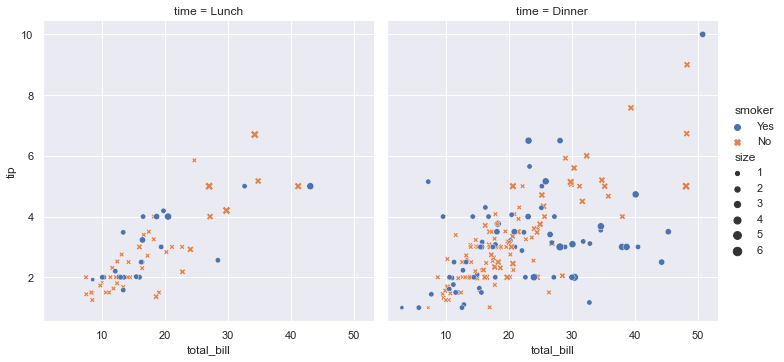

In [10]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

## Data Visualization and Exploration on Titanic Dataset

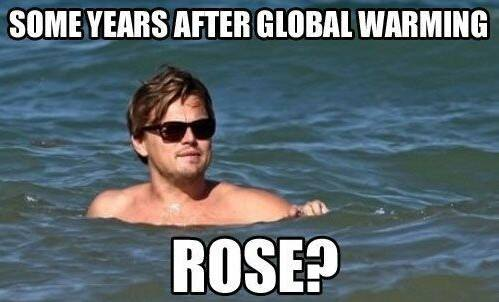

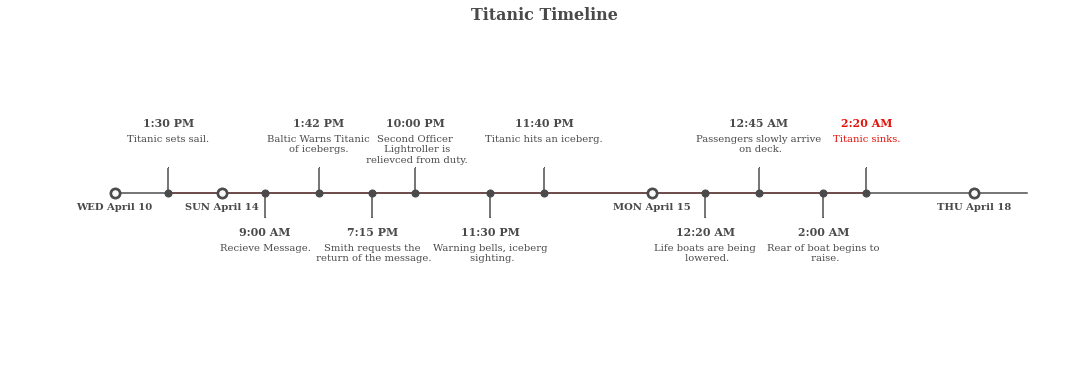

In [11]:
import pandas as pd
pd.set_option("display.max_columns", None)

### Step 1: Load Data and Basic Data Inspection

The data card is as follow:https://www.kaggle.com/c/titanic/data

In [12]:
data = pd.read_csv('data/titanic.csv',index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [13]:
# Check for missing values
print(data.isnull().sum())

Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64


Text(0.5, 1.0, 'Missing Values in Titanic Dataset')

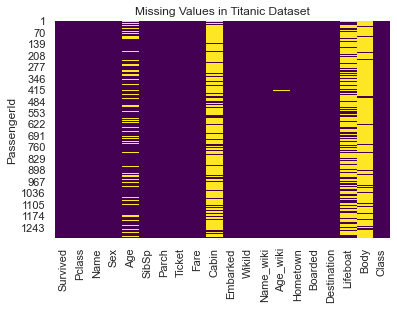

In [14]:
# Visualizing missing values with a heatmap
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Titanic Dataset")

In [15]:
# List of columns to drop based on their relevance and missing data
columns_to_drop = ['Cabin', 'Lifeboat', 'Body', 'Class']

# Drop the unnecessary columns
data = data.drop(columns=columns_to_drop)

In [16]:
# Data types and basic information
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000
mean,0.378151,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829
std,0.485111,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000


### Step 2: Univariate Analysis

Question: How would you like to view the survival rate in the most efficient way?

Answer: Using a pie chart. Pie charts are great for comparing categories in total.

[`plt.pie()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

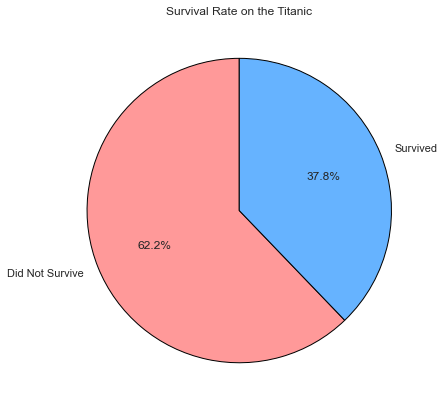

In [17]:
# Calculate survival counts
survival_counts = data['Survived'].value_counts()

# Define labels and colors for the pie chart
labels = ['Did Not Survive', 'Survived']
colors = ['#ff9999', '#66b3ff']

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, 
        wedgeprops={'edgecolor': 'black'})
plt.title("Survival Rate on the Titanic")
plt.show()

But, pie charts are not good for reading numerical values.

Bar charts are best for comparing numerical values with each other.If we wanna know how many people survived from titanic disaster, use bar chart!

[`sns.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html)

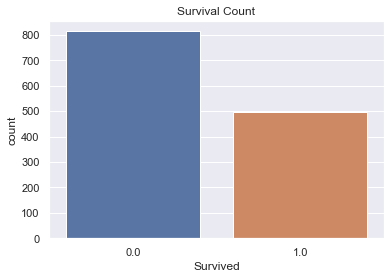

In [41]:
# Count plot for Survived
sns.countplot(data=data, x="Survived")
plt.title("Survival Count")
plt.show()

Pie charts and bar charts are used for categorical variables.

For analyzing continuous variables, histograms are commonly used.

When enabling the `kde` attribute, we are allowing the matplotlib to draw us a kde curve. Kernel Density Estimation (KDE) is a smooth, non-parametric way to estimate the distribution of data, offering the advantage of revealing underlying patterns without the binning limitations of histograms, making it useful for visualizing continuous data distributions.

[`sns.histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html)

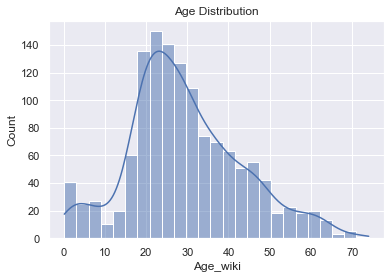

In [20]:
# Age distribution
sns.histplot(data['Age_wiki'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

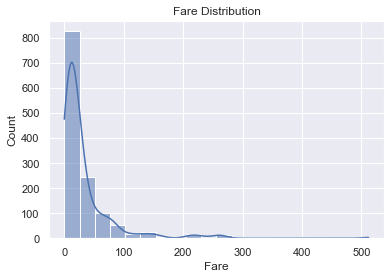

In [22]:
# Fare distribution
sns.histplot(data['Fare'], bins=20, kde=True)
plt.title("Fare Distribution")
plt.show()

There were a lot of people on Titanic. To show the distribution of features of those people, using **boxplot** would be a good idea.

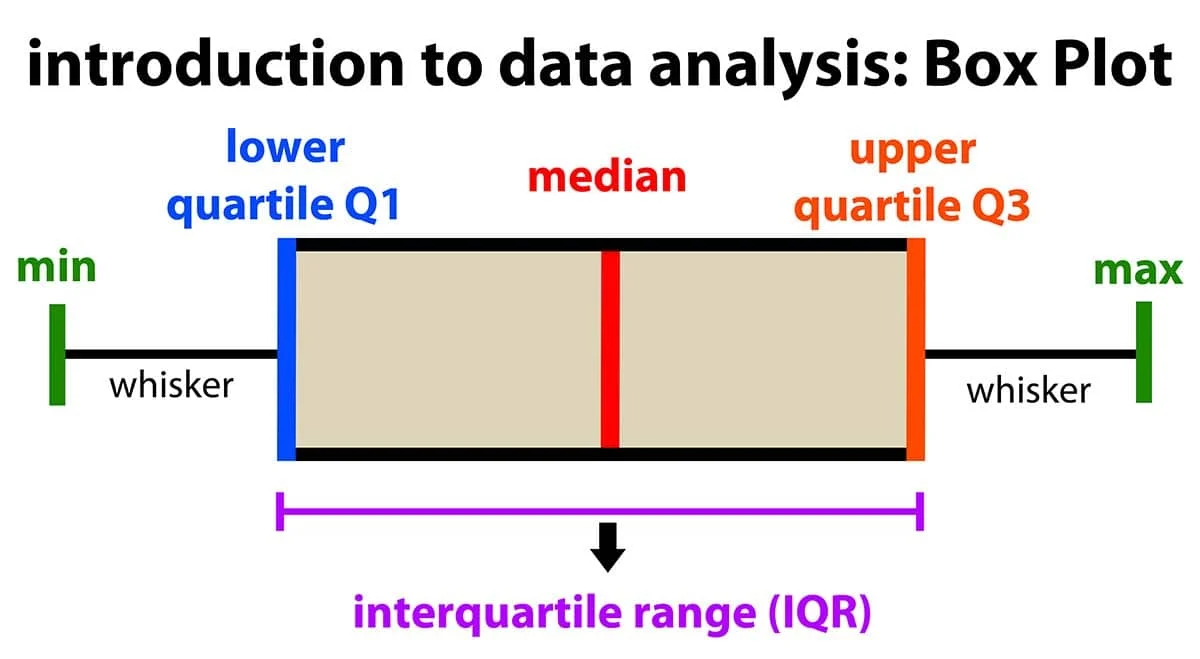

[`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

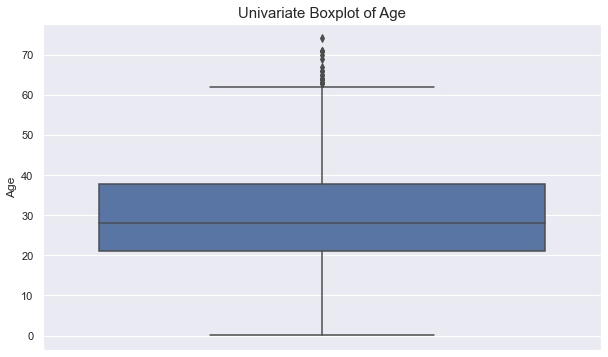

In [45]:
#Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot for 'Fare' with respect to 'Survived' as a hue
sns.boxplot(y='Age_wiki', data=data)

# Set the title and labels
plt.title('Univariate Boxplot of Age', size=15)
plt.ylabel('Age', size=12)

# Show the plot
plt.show()

### Step 3: Bivariate Analysis

We are going to analyze how `Pclass` features correlate with other features.

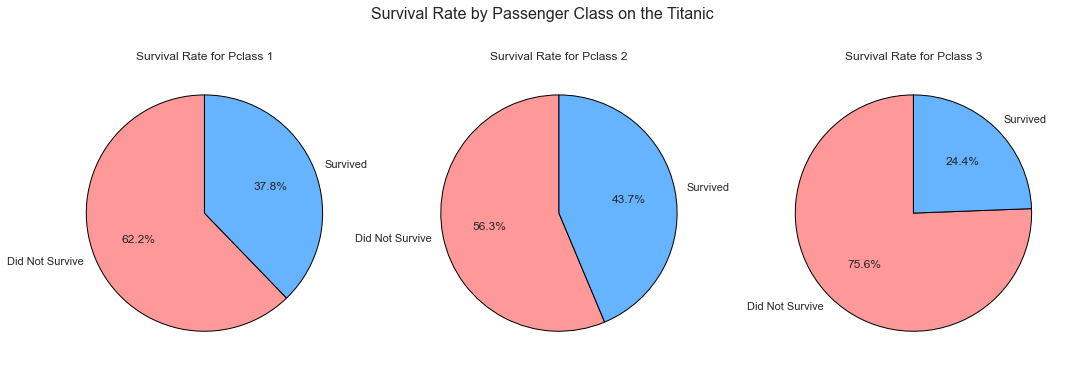

In [18]:
# Define colors and labels
colors = ['#ff9999', '#66b3ff']
labels = ['Did Not Survive', 'Survived']

# Set up the figure for three subplots (one for each class)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through each class and plot a pie chart for survival rates
for idx, pclass in enumerate(sorted(data['Pclass'].unique()), start=1):
    # Filter data for the current class
    class_data = data[data['Pclass'] == pclass]
    survival_counts = class_data['Survived'].value_counts()

    # Plot pie chart
    axes[idx - 1].pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90,
                      colors=colors, wedgeprops={'edgecolor': 'black'})
    axes[idx - 1].set_title(f"Survival Rate for Pclass {pclass}")

# Set the main title for all subplots
plt.suptitle("Survival Rate by Passenger Class on the Titanic", fontsize=16)
plt.show()

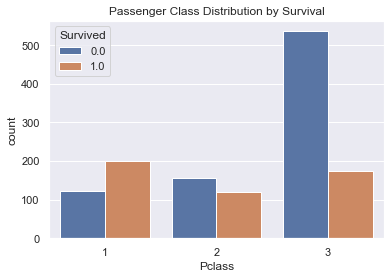

In [42]:
# Count plot for Pclass
sns.countplot(data=data, x="Pclass", hue="Survived")
plt.title("Passenger Class Distribution by Survival")
plt.show()

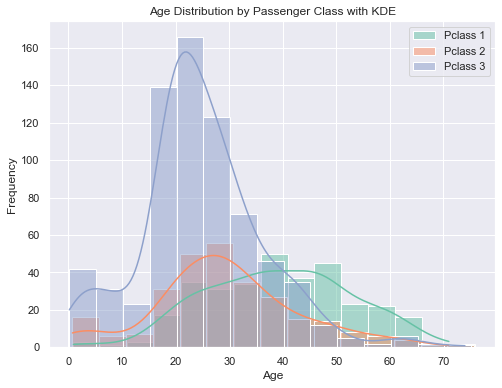

In [21]:
# Define colors for the classes
colors = sns.color_palette("Set2", 3)

# Set up the figure
plt.figure(figsize=(8, 6))

# Loop through each class and plot age histogram with KDE
for pclass in sorted(data['Pclass'].unique()):
    age_data = data[data['Pclass'] == pclass]['Age_wiki'].dropna()
    sns.histplot(age_data, binwidth=5, kde=True, color=colors[pclass-1], label=f'Pclass {pclass}', alpha=0.5)

# Add title, labels, and legend
plt.title("Age Distribution by Passenger Class with KDE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

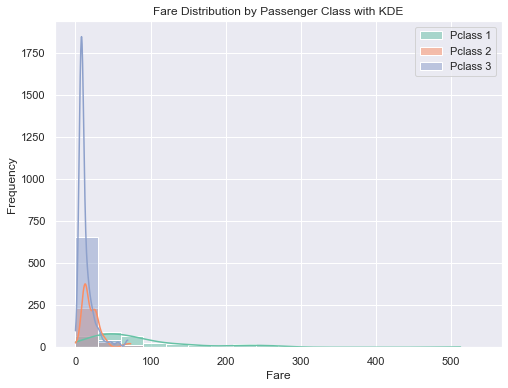

In [23]:
# Define colors for the classes
colors = sns.color_palette("Set2", 3)

# Set up the figure
plt.figure(figsize=(8, 6))

# Loop through each class and plot fare histogram with KDE
for pclass in sorted(data['Pclass'].unique()):
    fare_data = data[data['Pclass'] == pclass]['Fare'].dropna()
    sns.histplot(fare_data, binwidth=30, kde=True, color=colors[pclass-1], label=f'Pclass {pclass}', alpha=0.5)

# Add title, labels, and legend
plt.title("Fare Distribution by Passenger Class with KDE")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.legend()
plt.show()

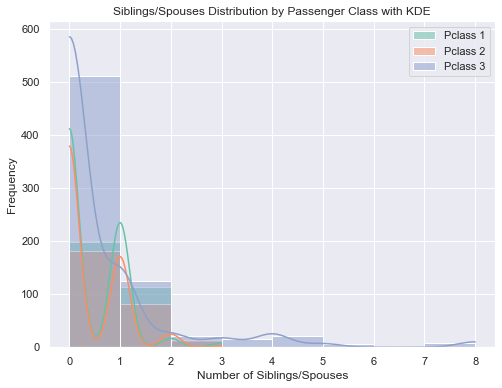

In [24]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Loop through each class and plot siblings/spouses histogram with KDE
for pclass in sorted(data['Pclass'].unique()):
    sibsp_data = data[data['Pclass'] == pclass]['SibSp'].dropna()
    sns.histplot(sibsp_data, binwidth=1, kde=True, color=colors[pclass-1], label=f'Pclass {pclass}', alpha=0.5)

# Add title, labels, and legend
plt.title("Siblings/Spouses Distribution by Passenger Class with KDE")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Frequency")
plt.legend()
plt.show()

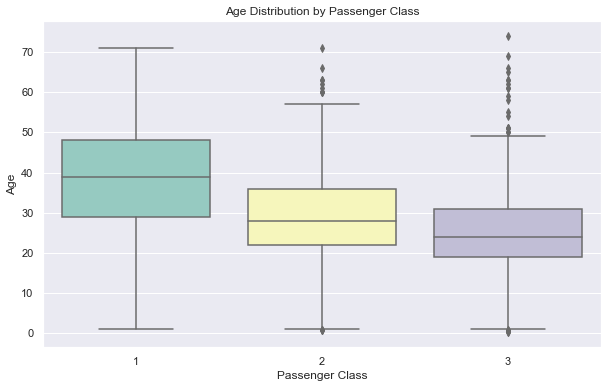

In [25]:
plt.figure(figsize=(10, 6))

# Create a boxplot of Age distribution across Passenger Classes
sns.boxplot(x='Pclass', y='Age_wiki', data=data, palette="Set3")

# Adding titles and labels
plt.title("Age Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

Question: What did you observed?

Now let's analyzing the correlation of survival rate with other features.

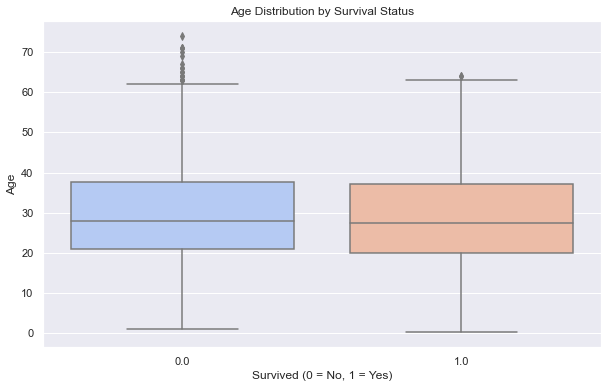

In [26]:
plt.figure(figsize=(10, 6))

# Create a boxplot of Age distribution by Survival
sns.boxplot(x='Survived', y='Age_wiki', data=data, palette="coolwarm")

# Adding titles and labels
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

[`sns.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [1]:
# Survival by gender
sns.barplot(x="Sex", y="Survived", data=data, ci=None)
plt.title("Survival Rate by Gender")
plt.show()

NameError: name 'sns' is not defined

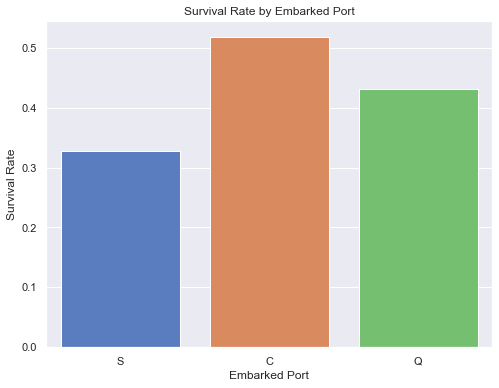

In [28]:
# Barplot to visualize the survival rate by Embarked
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=data, ci=None, palette='muted')
plt.title("Survival Rate by Embarked Port")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate")
plt.show()

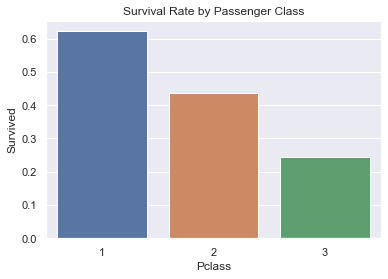

In [29]:
# Survival by Passenger Class
sns.barplot(x="Pclass", y="Survived", data=data, ci=None)
plt.title("Survival Rate by Passenger Class")
plt.show()

What to do if we wanna observe the correlation of numerical continuous variables visually?

We can use **scatter plots** to do so.

[`sns.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

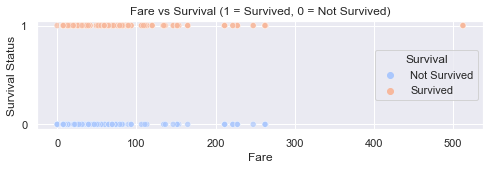

In [31]:
# Scatter plot of Fare vs Survival
plt.figure(figsize=(8, 2))
sns.scatterplot(x='Fare', y='Survived', data=data, hue='Survived', palette='coolwarm', alpha=0.7)
plt.title("Fare vs Survival (1 = Survived, 0 = Not Survived)")
plt.xlabel("Fare")
plt.ylabel("Survival Status")

# Set y-axis ticks to only show 0 and 1
plt.yticks([0, 1])

# Modify legend to reflect the actual colors used in the scatterplot
handles, labels = plt.gca().get_legend_handles_labels()
# Reassign the labels to be more clear
plt.legend(handles=handles, labels=['Not Survived', 'Survived'], title='Survival', loc='right')

plt.show()

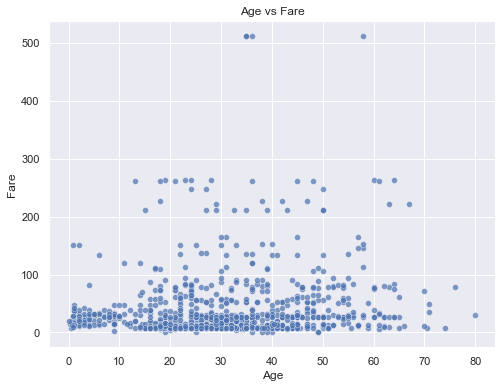

In [30]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Scatter plot of Age vs Fare without the survival color
sns.scatterplot(x='Age_wiki', y='Fare', data=data, alpha=0.7)

# Title and labels
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")

# Remove the legend (since we don't want survival coloring)
plt.legend([], [], frameon=False)

# Display the plot
plt.show()

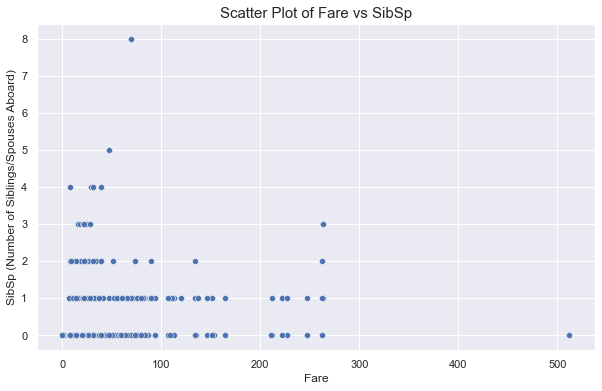

In [46]:
# Scatter plot for 'Fare' vs 'SibSp'
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='Fare', y='SibSp', data=data)

# Set the title and labels
plt.title('Scatter Plot of Fare vs SibSp', size=15)
plt.xlabel('Fare', size=12)
plt.ylabel('SibSp (Number of Siblings/Spouses Aboard)', size=12)

# Show the plot
plt.show()

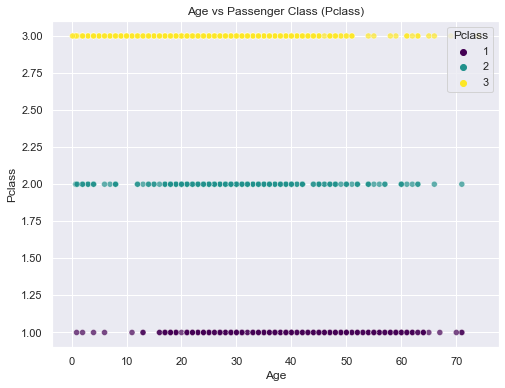

In [33]:
# Scatter plot of Age vs Passenger Class (Pclass)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age_wiki', y='Pclass', data=data, hue='Pclass', palette='viridis', alpha=0.7)
plt.title("Age vs Passenger Class (Pclass)")
plt.xlabel("Age")
plt.ylabel("Pclass")
plt.legend(title='Pclass', loc='upper right')
plt.show()

*To be fare, these scatter plots don't represent informative visualization.*

We can categorize the numerically continues variable into countable intervals to see if it could provide more informations to us.

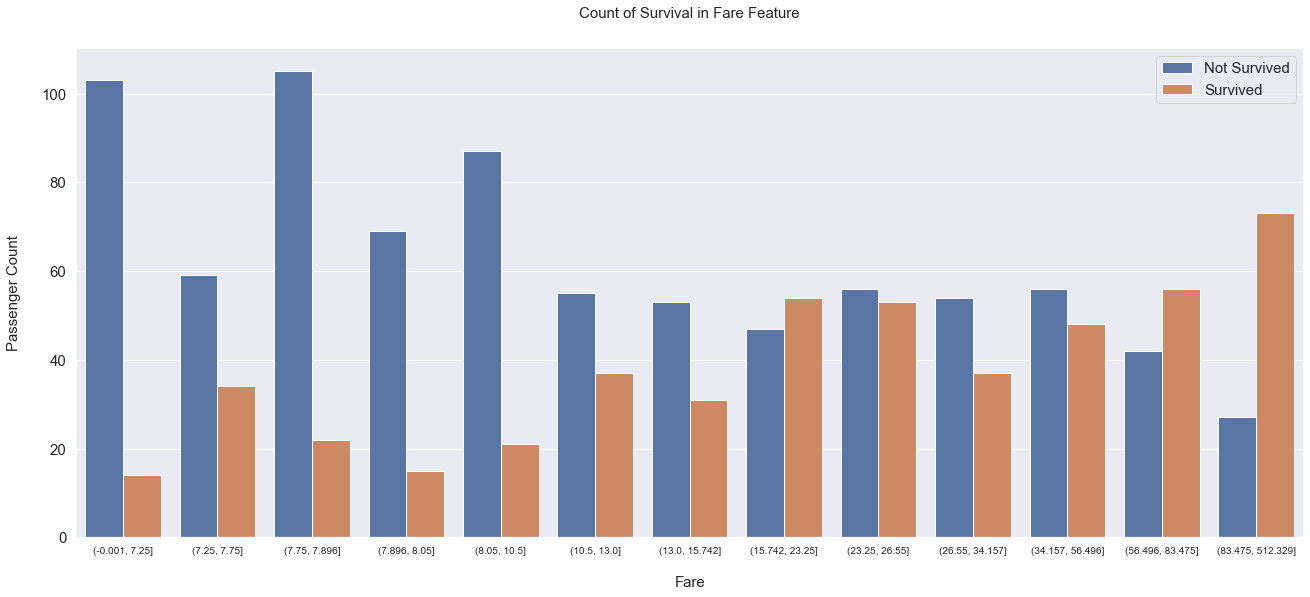

In [32]:
# Copy the data and bin the 'Fare' values using qcut
fare_binned = data.copy()
fare_binned['Fare_Binned'] = pd.qcut(fare_binned['Fare'], 13)

# Create the count plot with the binned Fare values
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare_Binned', hue='Survived', data=fare_binned)

# Set labels, tick sizes, and legend
plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

# Adjust legend and title
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

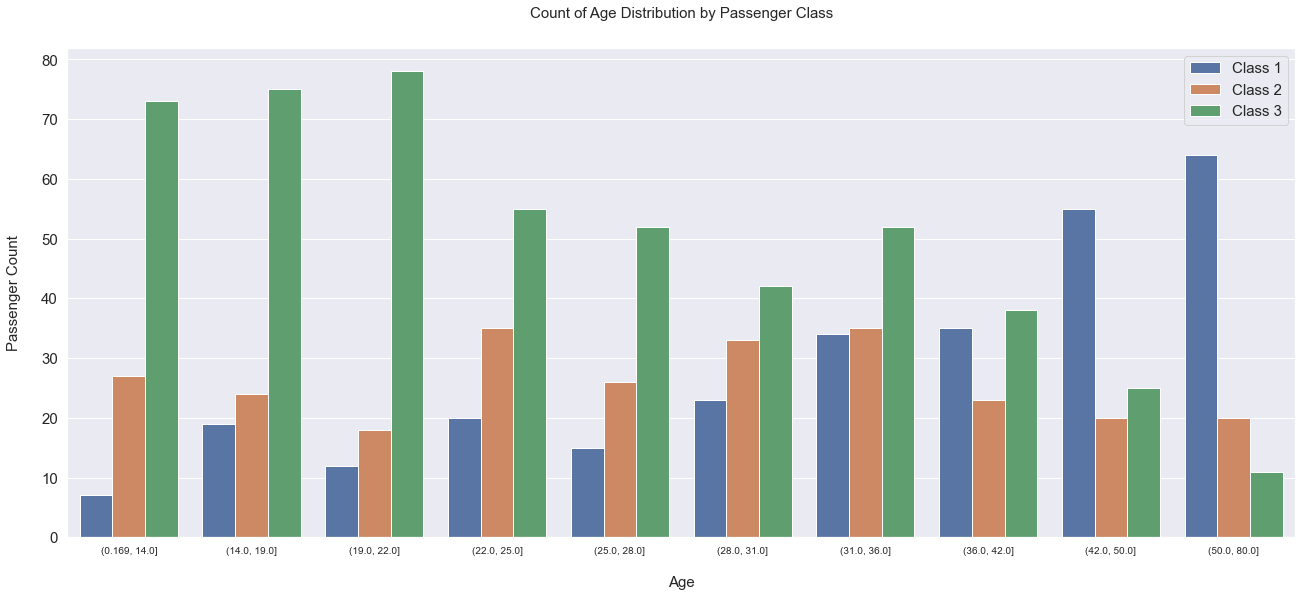

In [34]:
# Copy the data and bin the 'Age' values using qcut
age_binned = data.copy()
age_binned['Age_Binned'] = pd.qcut(age_binned['Age_wiki'].dropna(), 10)

# Create the count plot with the binned Age values
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age_Binned', hue='Pclass', data=age_binned)

# Set labels, tick sizes, and legend
plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

# Adjust legend and title
plt.legend(['Class 1', 'Class 2', 'Class 3'], loc='upper right', prop={'size': 15})
plt.title('Count of Age Distribution by Passenger Class', size=15, y=1.05)

plt.show()

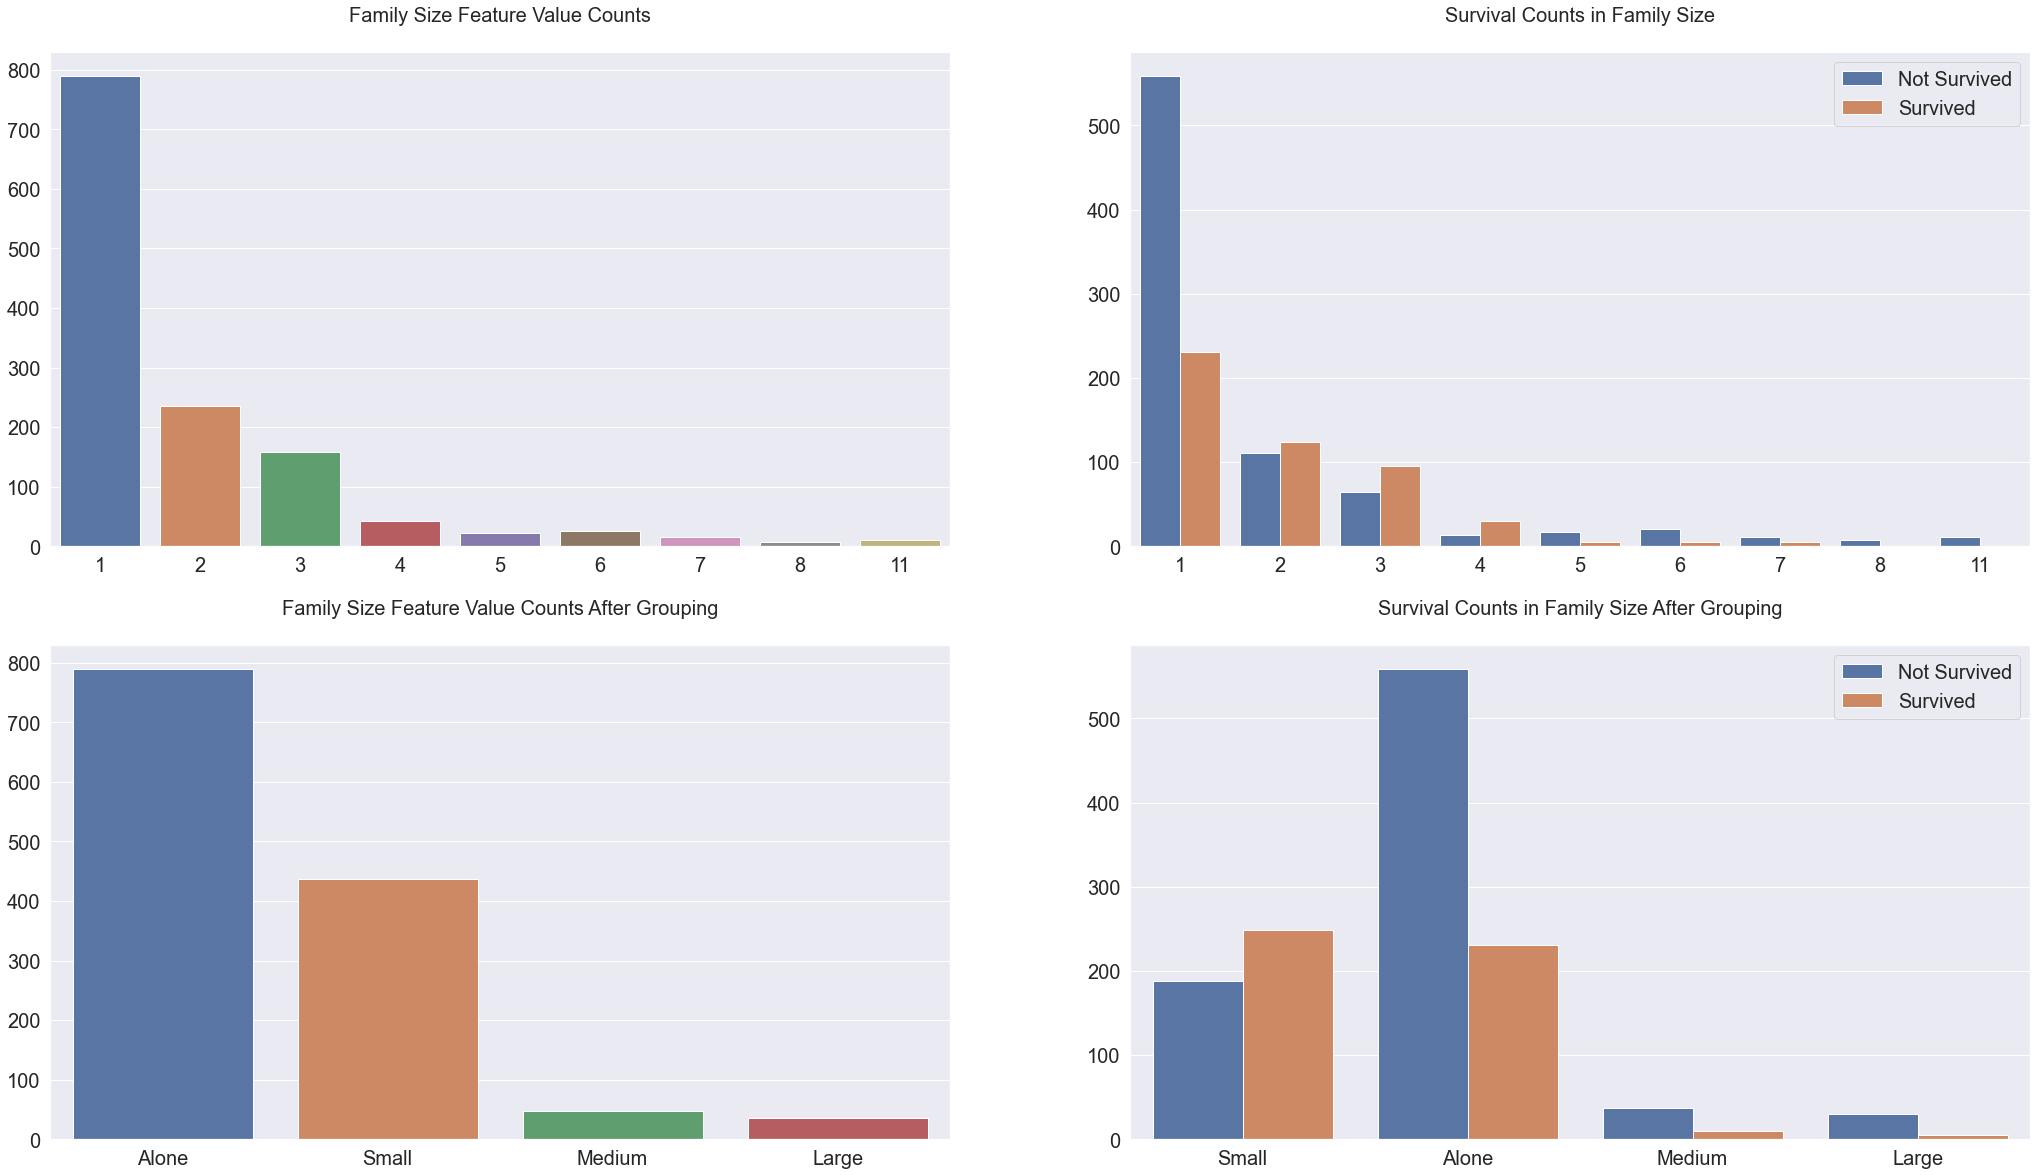

In [35]:
# Create a new feature 'Family_Size' by adding 'SibSp' (siblings/spouse) and 'Parch' (parents/children) along with 1 (for the individual themselves)
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1

# Create a 2x2 subplot with a larger figure size
fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)  # Adjust spacing between subplots

# Plot the value counts of Family_Size
sns.barplot(x=data['Family_Size'].value_counts().index, y=data['Family_Size'].value_counts().values, ax=axs[0][0])
# Plot the count of survival based on Family_Size
sns.countplot(x='Family_Size', hue='Survived', data=data, ax=axs[0][1])

# Set titles for the top row of plots
axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size', size=20, y=1.05)

# Create a mapping to group Family_Size into categories based on the size of the family
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
# Apply the mapping to create a new feature 'Family_Size_Grouped'
data['Family_Size_Grouped'] = data['Family_Size'].map(family_map)

# Plot the value counts of Family_Size_Grouped
sns.barplot(x=data['Family_Size_Grouped'].value_counts().index, y=data['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
# Plot the count of survival based on Family_Size_Grouped
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=data, ax=axs[1][1])

# Set titles for the bottom row of plots
axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

# Loop through the axes to adjust legends, ticks, and labels for all subplots
for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})  # Adjust legend
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)  # Set x-axis label size
        axs[i][j].tick_params(axis='y', labelsize=20)  # Set y-axis label size
        axs[i][j].set_xlabel('')  # Remove x-axis labels
        axs[i][j].set_ylabel('')  # Remove y-axis labels

# Display the plot
plt.show()

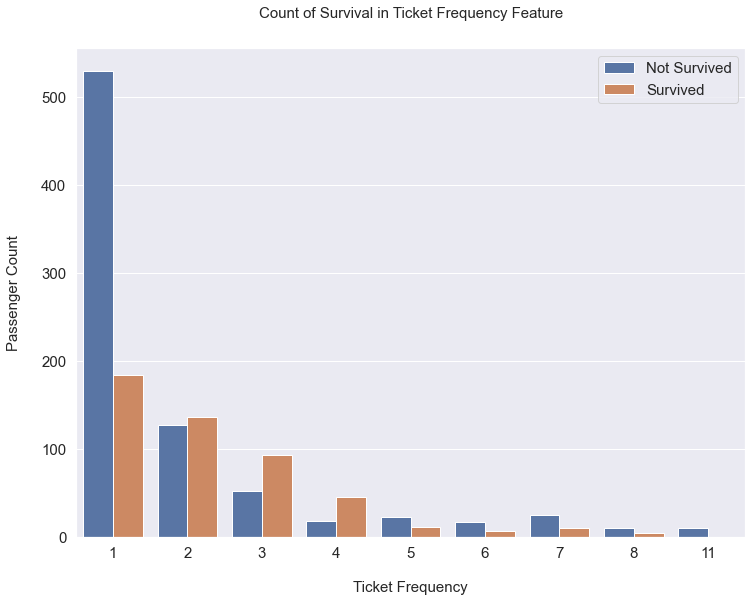

In [40]:
# Create a new column 'Ticket_Frequency' that contains the frequency of each ticket
# This is calculated by grouping the data by 'Ticket' and counting the occurrences
data['Ticket_Frequency'] = data.groupby('Ticket')['Ticket'].transform('count')

# Create a figure and axis with a specified size for the plot
fig, axs = plt.subplots(figsize=(12, 9))

# Create a countplot to show the distribution of 'Ticket_Frequency' with survival as a hue
# The 'hue' argument will differentiate passengers based on whether they survived or not
sns.countplot(x='Ticket_Frequency', hue='Survived', data=data)

# Set the x-axis label with a font size of 15 and padding of 20
plt.xlabel('Ticket Frequency', size=15, labelpad=20)
# Set the y-axis label with a font size of 15 and padding of 20
plt.ylabel('Passenger Count', size=15, labelpad=20)

# Set the font size for the x-axis and y-axis ticks
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

# Customize the legend to label the survival status clearly
# The legend shows 'Not Survived' and 'Survived' with a font size of 15
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})

# Set the title of the plot with a font size of 15 and position it slightly above the plot (y=1.05)
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

# Display the plot
plt.show()

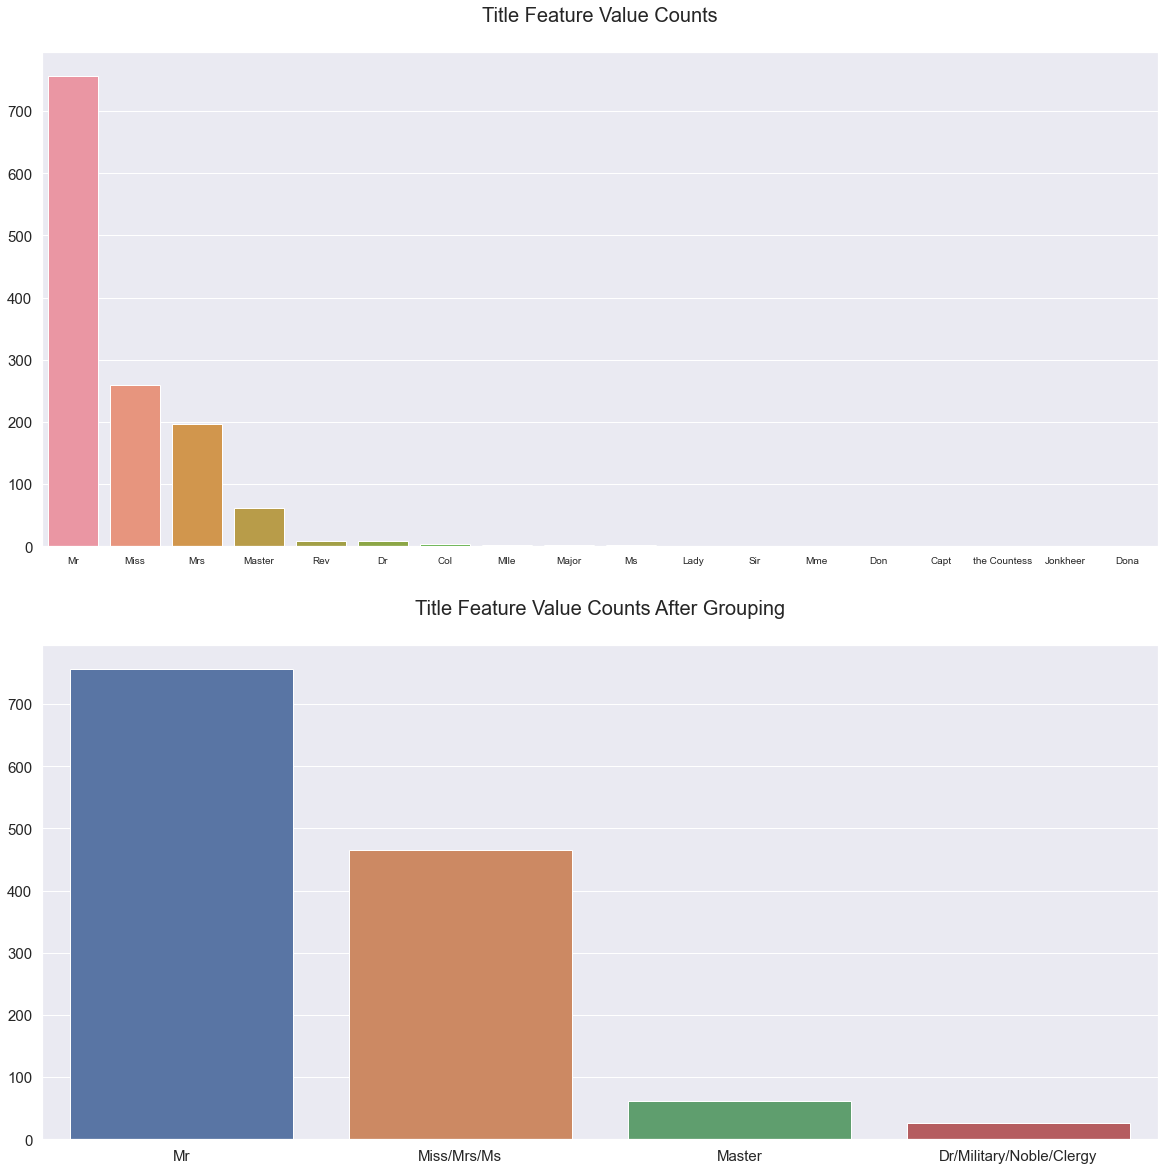

In [37]:
# Extract the title from the 'Name' column by splitting the name at ', ' and then at '.'
data['Title'] = data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

# Create a figure with two subplots (one row, two columns) with a size of (20, 20)
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

# First barplot: Count of each title in the dataset
sns.barplot(x=data['Title'].value_counts().index, y=data['Title'].value_counts().values, ax=axs[0])

# Set the x-axis label size for the first plot to 10
axs[0].tick_params(axis='x', labelsize=10)
# Set the x-axis label size for the second plot to 15
axs[1].tick_params(axis='x', labelsize=15)

# Set the y-axis label size for both plots to 15
for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

# Title for the first plot (value counts of the 'Title' feature)
axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

# Group similar titles together to simplify the title categories
# Replace certain titles with more general categories like 'Miss/Mrs/Ms' and 'Dr/Military/Noble/Clergy'
data['Title'] = data['Title'].replace(['Miss', 'Mrs', 'Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
data['Title'] = data['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

# Second barplot: Value counts of titles after grouping
sns.barplot(x=data['Title'].value_counts().index, y=data['Title'].value_counts().values, ax=axs[1])

# Title for the second plot (value counts after grouping)
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

# Display the plots
plt.show()

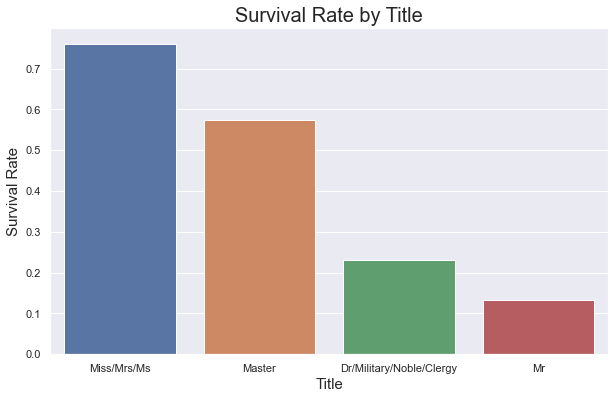

In [38]:
# Second barplot: Value counts of titles after grouping
sns.barplot(x=data['Title'].value_counts().index, y=data['Title'].value_counts().values, ax=axs[1])

# Title for the second plot (value counts after grouping)
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

# Display the plots
plt.show()

# Calculate the survival rate for each title by grouping by 'Title' and calculating the mean of 'Survived' (where 1 is survived, 0 is not)
survival_rate = data.groupby('Title')['Survived'].mean().sort_values(ascending=False)

# Create a new figure for the survival rate plot
plt.figure(figsize=(10, 6))

# Barplot for the survival rate by title
sns.barplot(x=survival_rate.index, y=survival_rate.values)

# Set labels and title
plt.xlabel('Title', size=15)
plt.ylabel('Survival Rate', size=15)
plt.title('Survival Rate by Title', size=20)

# Display the survival rate plot
plt.show()

### Step 4: Conclusion

What did we observe and what conclusion you can give from the above?

# Exercise
There is another file in the 'data' directory called [`starbuck_worldwide.csv`](https://www.kaggle.com/datasets/starbucks/store-locations).
Please follow these steps above which we applied on the titanic dataset to do a data exploration on your own.

In [ ]:
## Add your code here